In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Dropout 
import tensorflow as tf
import random as rn

Using TensorFlow backend.


In [4]:
def assign_label(img,cancer_type):
    return cancer_type

In [5]:
def make_train_data(cancer_type,DIR):
    for img in os.listdir(DIR):
        label=assign_label(img,cancer_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            
        X.append(np.array(img))
        Z.append(str(label))

In [6]:
X=[]
Z=[]
IMG_SIZE=50
bc_malignant_DIR='/Users/user/Desktop/test/malignant'
bc_benign_DIR='/Users/user/Desktop/test/benign'

In [7]:
print(os.listdir('/Users/user/Desktop/test'))

['benign', 'malignant']


In [8]:
make_train_data('benign',bc_benign_DIR)
print(len(X))

540


In [9]:
make_train_data('malignant',bc_malignant_DIR)
print(len(X))

1091


In [10]:
le=LabelEncoder()
Y=le.fit_transform(Z)
s=set(Z)
l=[]
for i in s:
    l.append(i)
cheak1=le.fit_transform(l)
cheak2=to_categorical(cheak1,2)
Y=to_categorical(Y,2)
X=np.array(X)
X=X/255

In [11]:
print(cheak2)
print(cheak1)
print(l)

[[0. 1.]
 [1. 0.]]
[1 0]
['malignant', 'benign']


In [12]:
from skimage import color
from skimage import io

In [13]:
X1=[]
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
DIR1='/Users/user/Desktop/test/benign'
DIR2='/Users/user/Desktop/test/malignant'
for img in os.listdir(DIR1):
        path = os.path.join(DIR1,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = color.rgb2gray(img)
        ret, b_img = cv2.threshold(img,.6,1,cv2.THRESH_BINARY)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        X1.append(b_img)
for img in os.listdir(DIR2):
        path = os.path.join(DIR2,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = color.rgb2gray(img)
        ret, b_img = cv2.threshold(img,.6,1,cv2.THRESH_BINARY)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        X1.append(b_img)

In [14]:
X1=np.array(X1)
print(X1.shape)

(1091, 50, 50)


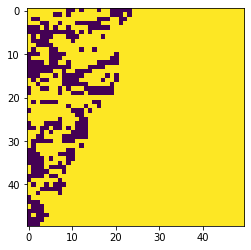

In [15]:
plt.imshow(b_img)

In [16]:
X3=[]
for i in range(1000):
    X2=[]
    for j in range(50):
        for k in range(50):
            X2.append(X1[i][j][k])
    X3.append(X2)

In [17]:
X3=np.array(X3)
print(X3.shape)

(1000, 2500)


In [18]:
import numpy as np
from ripser import ripser
from persim import plot_diagrams

In [19]:
import gudhi

In [117]:
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import PIL
from persim import plot_diagrams
from ripser import ripser, lower_star_img
import csv
import math
import warnings
import random
import copy
def betti_nums(data, sType, scanStart, scanStop, eps , showPlot = False, doSlice = False):
    letter = np.array([[0,0]])    
    if sType.lower() == 'ud':
        '''
        for k in range(scanStart,scanStop):
            if data[k] == 1:
                col = 50-int((k-1)/50)
                row = (k-1)%50
                letter = np.append(letter,[[row, col]], axis = 0)
        letter = np.delete(letter, 0, 0)
        if len(letter) == 0:
            return (0,0,0)
        '''
        #diagrams = ripser(letter, maxdim = 2, metric = 'euclidean',thresh = eps)['dgms']
        diagrams = ripser(data,maxdim=2,distance_matrix=False,metric = 'euclidean',thresh=100)['dgms']
    c=0
    for j in range(len(diagrams[0])):
        if((diagrams[0][j][1]-diagrams[0][j][0])>.00001):
            c+=1
    b0=c
    c=0
    for j in range(len(diagrams[1])):
        if((diagrams[1][j][1]-diagrams[1][j][0])>.00001):
            c+=1
    b1=c
    c=0
    for j in range(len(diagrams[2])):
        if((diagrams[2][j][1]-diagrams[2][j][0])>.00001):
            c+=1
    b2=c
    return (b0,b1,b2)
    
        
def classificationVector(dataSet, flag):
    scanTypes = [ 'du', 'lr', 'mo-hori', 'dist1', 'ptdim', 'shortlr','ends']
    if flag.lower() == 'whole':
        totalDataVect = []
        j = 0 
        while j != len(dataSet):
            print(j)
            letter_one_line = dataSet[j]    
            dataVect = np.array([])          
            (b0,b1,b2) = betti_nums(letter_one_line, 'ud', 1, 2500, eps = 1.42, showPlot = False, doSlice = False)
            dataVect = np.append(dataVect,b0)
            dataVect = np.append(dataVect,b1)
            dataVect = np.append(dataVect,b2)
            '''
            for sc in scanTypes:
                if sc.lower() == 'du':
                    (b0,b1) = betti_nums(letter_one_line, 'ud', 1100, 2500, eps = 1.42, showPlot = False, doSlice = False)
                    #dataVect = np.append(dataVect,b0)
                    dataVect = np.append(dataVect,b1)
                

                elif sc.lower() == 'mo-hori':
                    (b0,b1) = betti_nums(letter_one_line, 'ud', 600, 1200, eps = 1.42, showPlot = False, doSlice = False)
                    #dataVect = np.append(dataVect,b0)
                    dataVect = np.append(dataVect,b1)
        
           
          
                elif sc.lower() == 'dist1':
                    (b0,b1) = betti_nums(letter_one_line, 'ud', 1, 2500, eps = 1.42, showPlot = False, doSlice = False)
                    #dataVect = np.append(dataVect,b0)
                    dataVect = np.append(dataVect,b1)
                  
                elif sc.lower() == 'ptdim':
                    (b0,b1) = betti_nums(letter_one_line, 'ud', 1, 2500, eps = 1.42, showPlot = False, doSlice = False)
                    #dataVect = np.append(dataVect,b0)
                    dataVect = np.append(dataVect,b1)

        
                elif sc.lower() == 'shortlr':
                    (b0,b1) = betti_nums(letter_one_line, 'ud', 1, 1200, eps = 1.42, showPlot = False, doSlice = False)
                    #dataVect = np.append(dataVect,b0)
                    dataVect = np.append(dataVect,b1)
                
    
                elif sc.lower() == 'ends':
                    (b0u,b1u) = betti_nums(letter_one_line,'ud', 1,400, eps = 1.42, showPlot = False, doSlice = False)
                    (b0d,b1d) = betti_nums(letter_one_line,'ud', 1200,2500, eps = 1.42, showPlot = False, doSlice = False)
                    (b0l,b1l) = betti_nums(letter_one_line,'ud', 1,800, eps = 1.42, showPlot = False, doSlice = False)
                    #dataVect = np.append(dataVect, b0u+b0d+b0l)
                    dataVect = np.append(dataVect, b1u+b1d+b1l)
                else:
                    (b0,b1) = betti_nums(letter_one_line, 'ud', 1, 2000, eps = 1.42, showPlot = False, doSlice = False)
                    #dataVect = np.append(dataVect,b0)
                    dataVect = np.append(dataVect,b1)
         '''         
            totalDataVect.append(dataVect)
            j += 1

        return totalDataVect

In [118]:
X4= classificationVector(X1,'whole')

0


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


2


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


3


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


4


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


5


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


6


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


7


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


8


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


9


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


10


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


11


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


12


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


13


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


14


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


15


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


16


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


17


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


18


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


19


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


20


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


21


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


22


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


23


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


24


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


25


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


26


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


27


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


28


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


29


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


30


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


31


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


32


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


33


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


34


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


35


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


36


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


37


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


38


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


39


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


40


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


41


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


42


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


43


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


44


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


45


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


46


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


47


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


48


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


49


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


50


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


51


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


52


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


53


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


54


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


55


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


56


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


57


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


58


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


59


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


60


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


61


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


62


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


63


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


64


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


65


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


66


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


67


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


68


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


69


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


70


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


71


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


72


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


73


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


74


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


75


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


76


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


77


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


78


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


79


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


80


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


81


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


82


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


83


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


84


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


85


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


86


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


87


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


88


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


89


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


90


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


91


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


92


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


93


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


94


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


95


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


96


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


97


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


98


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


99


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


100


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


101


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


102


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


103


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


104


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


105


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


106


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


107


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


108


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


109


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


110


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


111


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


112


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


113


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


114


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


115


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


116


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


117


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


118


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


119


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


120


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


121


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


122


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


123


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


124


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


125


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


126


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


127


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


128


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


129


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


130


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


131


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


132


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


133


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


134


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


135


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


136


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


137


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


138


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


139


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


140


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


141


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


142


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


143


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


144


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


145


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


146


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


147


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


148


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


149


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


150


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


151


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


152


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


153


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


154


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


155


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


156


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


157


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


158


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


159


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


160


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


161


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


162


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


163


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


164


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


165


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


166


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


167


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


168


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


169


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


170


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


171


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


172


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


173


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


174


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


175


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


176


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


177


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


178


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


179


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


180


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


181


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


182


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


183


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


184


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


185


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


186


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


187


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


188


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


189


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


190


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


191


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


192


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


193


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


194


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


195


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


196


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


197


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


198


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


199


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


200


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


201


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


202


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


203


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


204


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


205


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


206


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


207


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


208


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


209


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


210


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


211


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


212


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


213


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


214


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


215


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


216


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


217


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


218


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


219


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


220


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


221


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


222


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


223


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


224


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


225


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


226


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


227


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


228


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


229


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


230


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


231


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


232


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


233


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


234


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


235


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


236


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


237


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


238


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


239


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


240


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


241


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


242


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


243


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


244


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


245


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


246


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


247


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


248


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


249


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


250


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


251


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


252


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


253


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


254


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


255


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


256


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


257


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


258


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


259


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


260


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


261


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


262


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


263


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


264


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


265


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


266


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


267


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


268


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


269


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


270


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


271


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


272


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


273


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


274


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


275


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


276


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


277


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


278


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


279


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


280


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


281


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


282


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


283


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


284


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


285


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


286


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


287


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


288


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


289


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


290


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


291


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


292


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


293


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


294


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


295


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


296


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


297


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


298


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


299


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


300


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


301


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


302


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


303


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


304


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


305


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


306


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


307


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


308


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


309


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


310


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


311


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


312


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


313


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


314


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


315


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


316


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


317


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


318


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


319


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


320


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


321


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


322


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


323


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


324


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


325


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


326


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


327


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


328


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


329


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


330


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


331


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


332


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


333


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


334


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


335


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


336


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


337


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


338


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


339


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


340


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


341


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


342


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


343


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


344


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


345


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


346


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


347


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


348


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


349


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


350


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


351


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


352


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


353


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


354


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


355


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


356


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


357


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


358


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


359


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


360


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


361


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


362


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


363


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


364


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


365


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


366


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


367


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


368


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


369


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


370


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


371


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


372


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


373


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


374


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


375


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


376


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


377


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


378


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


379


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


380


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


381


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


382


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


383


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


384


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


385


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


386


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


387


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


388


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


389


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


390


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


391


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


392


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


393


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


394


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


395


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


396


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


397


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


398


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


399


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


400


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


401


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


402


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


403


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


404


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


405


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


406


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


407


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


408


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


409


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


410


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


411


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


412


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


413


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


414


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


415


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


416


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


417


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


418


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


419


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


420


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


421


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


422


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


423


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


424


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


425


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


426


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


427


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


428


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


429


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


430


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


431


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


432


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


433


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


434


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


435


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


436


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


437


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


438


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


439


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


440


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


441


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


442


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


443


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


444


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


445


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


446


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


447


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


448


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


449


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


450


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


451


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


452


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


453


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


454


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


455


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


456


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


457


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


458


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


459


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


460


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


461


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


462


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


463


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


464


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


465


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


466


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


467


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


468


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


469


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


470


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


471


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


472


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


473


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


474


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


475


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


476


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


477


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


478


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


479


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


480


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


481


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


482


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


483


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


484


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


485


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


486


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


487


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


488


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


489


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


490


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


491


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


492


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


493


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


494


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


495


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


496


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


497


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


498


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


499


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


500


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


501


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


502


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


503


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


504


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


505


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


506


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


507


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


508


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


509


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


510


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


511


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


512


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


513


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


514


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


515


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


516


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


517


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


518


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


519


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


520


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


521


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


522


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


523


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


524


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


525


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


526


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


527


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


528


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


529


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


530


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


531


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


532


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


533


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


534


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


535


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


536


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


537


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


538


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


539


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


540


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


541


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


542


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


543


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


544


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


545


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


546


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


547


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


548


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


549


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


550


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


551


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


552


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


553


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


554


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


555


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


556


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


557


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


558


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


559


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


560


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


561


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


562


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


563


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


564


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


565


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


566


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


567


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


568


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


569


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


570


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


571


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


572


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


573


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


574


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


575


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


576


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


577


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


578


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


579


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


580


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


581


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


582


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


583


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


584


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


585


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


586


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


587


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


588


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


589


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


590


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


591


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


592


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


593


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


594


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


595


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


596


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


597


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


598


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


599


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


600


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


601


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


602


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


603


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


604


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


605


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


606


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


607


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


608


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


609


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


610


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


611


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


612


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


613


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


614


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


615


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


616


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


617


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


618


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


619


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


620


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


621


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


622


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


623


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


624


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


625


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


626


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


627


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


628


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


629


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


630


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


631


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


632


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


633


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


634


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


635


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


636


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


637


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


638


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


639


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


640


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


641


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


642


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


643


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


644


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


645


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


646


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


647


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


648


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


649


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


650


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


651


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


652


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


653


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


654


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


655


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


656


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


657


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


658


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


659


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


660


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


661


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


662


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


663


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


664


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


665


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


666


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


667


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


668


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


669


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


670


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


671


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


672


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


673


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


674


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


675


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


676


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


677


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


678


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


679


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


680


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


681


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


682


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


683


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


684


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


685


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


686


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


687


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


688


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


689


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


690


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


691


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


692


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


693


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


694


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


695


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


696


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


697


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


698


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


699


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


700


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


701


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


702


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


703


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


704


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


705


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


706


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


707


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


708


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


709


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


710


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


711


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


712


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


713


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


714


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


715


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


716


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


717


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


718


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


719


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


720


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


721


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


722


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


723


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


724


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


725


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


726


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


727


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


728


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


729


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


730


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


731


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


732


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


733


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


734


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


735


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


736


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


737


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


738


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


739


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


740


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


741


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


742


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


743


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


744


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


745


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


746


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


747


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


748


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


749


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


750


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


751


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


752


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


753


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


754


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


755


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


756


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


757


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


758


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


759


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


760


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


761


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


762


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


763


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


764


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


765


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


766


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


767


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


768


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


769


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


770


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


771


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


772


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


773


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


774


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


775


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


776


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


777


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


778


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


779


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


780


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


781


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


782


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


783


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


784


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


785


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


786


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


787


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


788


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


789


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


790


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


791


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


792


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


793


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


794


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


795


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


796


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


797


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


798


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


799


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


800


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


801


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


802


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


803


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


804


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


805


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


806


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


807


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


808


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


809


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


810


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


811


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


812


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


813


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


814


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


815


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


816


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


817


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


818


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


819


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


820


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


821


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


822


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


823


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


824


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


825


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


826


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


827


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


828


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


829


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


830


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


831


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


832


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


833


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


834


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


835


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


836


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


837


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


838


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


839


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


840


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


841


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


842


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


843


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


844


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


845


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


846


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


847


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


848


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


849


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


850


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


851


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


852


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


853


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


854


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


855


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


856


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


857


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


858


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


859


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


860


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


861


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


862


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


863


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


864


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


865


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


866


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


867


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


868


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


869


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


870


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


871


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


872


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


873


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


874


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


875


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


876


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


877


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


878


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


879


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


880


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


881


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


882


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


883


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


884


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


885


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


886


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


887


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


888


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


889


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


890


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


891


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


892


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


893


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


894


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


895


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


896


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


897


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


898


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


899


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


900


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


901


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


902


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


903


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


904


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


905


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


906


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


907


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


908


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


909


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


910


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


911


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


912


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


913


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


914


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


915


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


916


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


917


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


918


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


919


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


920


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


921


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


922


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


923


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


924


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


925


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


926


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


927


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


928


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


929


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


930


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


931


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


932


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


933


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


934


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


935


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


936


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


937


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


938


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


939


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


940


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


941


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


942


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


943


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


944


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


945


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


946


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


947


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


948


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


949


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


950


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


951


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


952


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


953


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


954


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


955


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


956


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


957


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


958


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


959


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


960


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


961


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


962


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


963


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


964


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


965


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


966


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


967


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


968


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


969


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


970


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


971


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


972


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


973


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


974


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


975


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


976


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


977


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


978


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


979


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


980


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


981


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


982


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


983


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


984


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


985


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


986


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


987


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


988


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


989


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


990


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


991


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


992


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


993


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


994


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


995


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


996


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


997


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


998


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


999


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1000


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1001


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1002


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1003


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1004


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1005


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1006


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1007


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1008


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1009


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1010


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1011


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1012


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1013


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1014


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1015


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1016


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1017


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1018


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1019


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1020


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1021


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1022


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1023


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1024


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1025


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1026


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1027


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1028


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1029


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1030


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1031


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1032


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1033


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1034


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1035


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1036


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1037


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1038


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1039


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1040


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1041


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1042


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1043


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1044


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1045


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1046


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1047


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1048


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1049


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1050


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1051


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1052


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1053


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1054


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1055


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1056


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1057


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1058


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1059


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1060


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1061


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1062


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1063


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1064


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1065


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1066


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1067


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1068


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1069


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1070


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1071


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1072


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1073


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1074


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1075


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1076


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1077


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1078


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1079


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1080


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1081


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1082


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1083


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1084


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1085


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1086


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1087


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1088


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1089


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1090


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


In [119]:
X4=np.array(X4)
X4.shape

(1091, 3)

In [120]:
Y=Y[:1000]

In [123]:
for i in range(1000):
  print(X4[i][0])

33.0
41.0
35.0
47.0
50.0
46.0
50.0
49.0
50.0
25.0
46.0
30.0
50.0
31.0
31.0
50.0
50.0
50.0
50.0
50.0
27.0
49.0
18.0
25.0
42.0
19.0
31.0
41.0
47.0
15.0
37.0
50.0
50.0
48.0
47.0
25.0
49.0
30.0
29.0
41.0
44.0
50.0
50.0
31.0
21.0
26.0
23.0
33.0
23.0
29.0
24.0
34.0
24.0
41.0
46.0
47.0
50.0
45.0
49.0
50.0
50.0
48.0
50.0
50.0
45.0
45.0
50.0
47.0
25.0
38.0
43.0
50.0
50.0
30.0
20.0
42.0
30.0
22.0
19.0
31.0
25.0
30.0
44.0
44.0
49.0
48.0
47.0
41.0
46.0
48.0
50.0
50.0
50.0
50.0
50.0
48.0
50.0
50.0
50.0
50.0
43.0
29.0
21.0
25.0
47.0
40.0
27.0
21.0
21.0
11.0
25.0
47.0
38.0
44.0
39.0
50.0
50.0
45.0
50.0
50.0
50.0
50.0
47.0
50.0
50.0
50.0
50.0
50.0
46.0
49.0
50.0
50.0
50.0
50.0
48.0
35.0
29.0
46.0
42.0
37.0
48.0
9.0
12.0
21.0
48.0
30.0
47.0
44.0
50.0
50.0
46.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
48.0
50.0
50.0
50.0
50.0
33.0
33.0
50.0
46.0
42.0
50.0
15.0
39.0
16.0
25.0
34.0
39.0
40.0
38.0
50.0
50.0
45.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
48.0
50.0
5

In [91]:
X4=X4[:1000]

In [92]:
YZ=[]
for i in Y:
    if i[0]==1:
        YZ.append(0)
    else:
        YZ.append(1)

In [102]:
x_train,x_test,y_train,y_test=train_test_split(X4,Y,test_size=0.25,random_state=42)

In [98]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X4,YZ)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [103]:
y_pred = svclassifier.predict(X4)
print(y_pred)

[1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0
 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 

In [104]:
correct=0
incorrect=0
for i in range(len(y_pred)):
    if(y_pred[i]==YZ[i]):
        correct+=1
    else:
        incorrect+=1
print(correct)
print(incorrect)

708
292


In [263]:
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential
from keras.layers import Dropout, Flatten,Activation
image_size =3
num_classes = 2 

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.


model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Dense(units=num_classes, activation='softmax'))

In [264]:
batch_size=128
epochs=100

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [265]:
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)
model.summary()
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=100,validation_data = (x_test,y_test),
                              verbose = 1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 32)                320       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
activation_7 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               16896     
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)              

Epoch 37/100
750/750 [==============================] - ETA: 0s - loss: 0.6230 - accuracy: 0.66 - 0s 75us/step - loss: 0.6368 - accuracy: 0.6360 - val_loss: 0.6281 - val_accuracy: 0.6520
Epoch 38/100
750/750 [==============================] - ETA: 0s - loss: 0.6703 - accuracy: 0.61 - 0s 69us/step - loss: 0.6221 - accuracy: 0.6747 - val_loss: 0.6285 - val_accuracy: 0.6560
Epoch 39/100
750/750 [==============================] - ETA: 0s - loss: 0.6265 - accuracy: 0.64 - 0s 69us/step - loss: 0.6437 - accuracy: 0.6533 - val_loss: 0.6300 - val_accuracy: 0.6520
Epoch 40/100
750/750 [==============================] - ETA: 0s - loss: 0.6371 - accuracy: 0.64 - 0s 64us/step - loss: 0.6427 - accuracy: 0.6520 - val_loss: 0.6264 - val_accuracy: 0.6640
Epoch 41/100
750/750 [==============================] - ETA: 0s - loss: 0.5986 - accuracy: 0.69 - 0s 64us/step - loss: 0.6292 - accuracy: 0.6547 - val_loss: 0.6361 - val_accuracy: 0.6560
Epoch 42/100
750/750 [==============================] - ETA: 0s -

Epoch 81/100
750/750 [==============================] - ETA: 0s - loss: 0.5716 - accuracy: 0.67 - 0s 37us/step - loss: 0.6024 - accuracy: 0.6733 - val_loss: 0.6230 - val_accuracy: 0.6760
Epoch 82/100
750/750 [==============================] - ETA: 0s - loss: 0.5987 - accuracy: 0.70 - 0s 37us/step - loss: 0.6181 - accuracy: 0.6733 - val_loss: 0.6214 - val_accuracy: 0.6840
Epoch 83/100
750/750 [==============================] - ETA: 0s - loss: 0.5719 - accuracy: 0.66 - 0s 37us/step - loss: 0.6211 - accuracy: 0.6613 - val_loss: 0.6222 - val_accuracy: 0.6720
Epoch 84/100
750/750 [==============================] - ETA: 0s - loss: 0.6100 - accuracy: 0.66 - 0s 37us/step - loss: 0.6066 - accuracy: 0.6747 - val_loss: 0.6166 - val_accuracy: 0.6560
Epoch 85/100
750/750 [==============================] - ETA: 0s - loss: 0.5790 - accuracy: 0.70 - 0s 37us/step - loss: 0.6190 - accuracy: 0.6680 - val_loss: 0.6194 - val_accuracy: 0.6480
Epoch 86/100
750/750 [==============================] - ETA: 0s -

In [105]:
X=[]
Z=[]
IMG_SIZE=50
bc_malignant_DIR='/Users/user/Desktop/test/malignant'
bc_benign_DIR='/Users/user/Desktop/test/benign'

In [106]:
make_train_data('benign',bc_benign_DIR)
print(len(X))
make_train_data('malignant',bc_malignant_DIR)
print(len(X))

540
1091


In [107]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y1=Y
s=set(Z)
l=[]
for i in s:
    l.append(i)
cheak1=le.fit_transform(l)
Y=to_categorical(Y,2)
X=np.array(X)
X=X/255

In [108]:
X1=[]
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
DIR1='/Users/user/Desktop/test/benign'
DIR2='/Users/user/Desktop/test/malignant'
for img in os.listdir(DIR1):
        path = os.path.join(DIR1,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = color.rgb2gray(img)
        ret, b_img = cv2.threshold(img,.5,1,cv2.THRESH_BINARY)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        X1.append(b_img)
for img in os.listdir(DIR2):
        path = os.path.join(DIR2,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = color.rgb2gray(img)
        ret, b_img = cv2.threshold(img,.5,1,cv2.THRESH_BINARY)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        X1.append(b_img)


In [81]:
X3=[]
for i in range(1000):
    X2=[]
    for j in range(50):
        for k in range(50):
            X2.append(X1[i][j][k])  
    X3.append(X2)

In [82]:
X3=np.array(X3)
print(X3.shape)

(1000, 2500)


In [110]:
x_te= classificationVector(X1,'whole')

0


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


2


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


3


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


4


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


5


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


6


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


7


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


8


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


9


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


10


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


11


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


12


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


13


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


14


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


15


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


16


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


17


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


18


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


19


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


20


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


21


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


22


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


23


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


24


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


25


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


26


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


27


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


28


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


29


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


30


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


31


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


32


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


33


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


34


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


35


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


36


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


37


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


38


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


39


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


40


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


41


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


42


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


43


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


44


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


45


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


46


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


47


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


48


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


49


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


50


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


51


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


52


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


53


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


54


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


55


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


56


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


57


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


58


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


59


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


60


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


61


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


62


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


63


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


64


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


65


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


66


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


67


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


68


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


69


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


70


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


71


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


72


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


73


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


74


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


75


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


76


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


77


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


78


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


79


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


80


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


81


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


82


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


83


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


84


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


85


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


86


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


87


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


88


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


89


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


90


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


91


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


92


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


93


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


94


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


95


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


96


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


97


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


98


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


99


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


100


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


101


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


102


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


103


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


104


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


105


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


106


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


107


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


108


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


109


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


110


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


111


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


112


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


113


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


114


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


115


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


116


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


117


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


118


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


119


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


120


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


121


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


122


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


123


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


124


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


125


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


126


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


127


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


128


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


129


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


130


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


131


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


132


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


133


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


134


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


135


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


136


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


137


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


138


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


139


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


140


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


141


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


142


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


143


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


144


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


145


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


146


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


147


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


148


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


149


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


150


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


151


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


152


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


153


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


154


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


155


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


156


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


157


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


158


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


159


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


160


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


161


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


162


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


163


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


164


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


165


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


166


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


167


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


168


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


169


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


170


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


171


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


172


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


173


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


174


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


175


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


176


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


177


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


178


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


179


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


180


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


181


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


182


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


183


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


184


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


185


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


186


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


187


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


188


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


189


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


190


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


191


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


192


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


193


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


194


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


195


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


196


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


197


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


198


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


199


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


200


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


201


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


202


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


203


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


204


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


205


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


206


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


207


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


208


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


209


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


210


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


211


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


212


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


213


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


214


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


215


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


216


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


217


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


218


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


219


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


220


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


221


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


222


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


223


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


224


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


225


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


226


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


227


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


228


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


229


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


230


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


231


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


232


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


233


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


234


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


235


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


236


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


237


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


238


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


239


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


240


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


241


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


242


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


243


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


244


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


245


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


246


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


247


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


248


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


249


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


250


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


251


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


252


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


253


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


254


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


255


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


256


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


257


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


258


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


259


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


260


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


261


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


262


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


263


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


264


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


265


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


266


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


267


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


268


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


269


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


270


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


271


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


272


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


273


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


274


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


275


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


276


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


277


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


278


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


279


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


280


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


281


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


282


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


283


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


284


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


285


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


286


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


287


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


288


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


289


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


290


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


291


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


292


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


293


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


294


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


295


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


296


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


297


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


298


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


299


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


300


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


301


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


302


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


303


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


304


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


305


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


306


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


307


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


308


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


309


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


310


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


311


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


312


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


313


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


314


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


315


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


316


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


317


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


318


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


319


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


320


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


321


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


322


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


323


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


324


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


325


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


326


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


327


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


328


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


329


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


330


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


331


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


332


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


333


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


334


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


335


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


336


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


337


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


338


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


339


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


340


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


341


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


342


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


343


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


344


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


345


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


346


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


347


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


348


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


349


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


350


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


351


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


352


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


353


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


354


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


355


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


356


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


357


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


358


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


359


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


360


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


361


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


362


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


363


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


364


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


365


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


366


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


367


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


368


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


369


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


370


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


371


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


372


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


373


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


374


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


375


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


376


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


377


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


378


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


379


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


380


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


381


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


382


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


383


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


384


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


385


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


386


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


387


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


388


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


389


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


390


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


391


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


392


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


393


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


394


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


395


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


396


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


397


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


398


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


399


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


400


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


401


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


402


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


403


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


404


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


405


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


406


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


407


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


408


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


409


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


410


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


411


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


412


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


413


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


414


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


415


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


416


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


417


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


418


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


419


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


420


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


421


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


422


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


423


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


424


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


425


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


426


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


427


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


428


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


429


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


430


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


431


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


432


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


433


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


434


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


435


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


436


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


437


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


438


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


439


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


440


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


441


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


442


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


443


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


444


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


445


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


446


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


447


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


448


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


449


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


450


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


451


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


452


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


453


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


454


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


455


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


456


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


457


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


458


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


459


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


460


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


461


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


462


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


463


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


464


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


465


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


466


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


467


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


468


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


469


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


470


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


471


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


472


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


473


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


474


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


475


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


476


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


477


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


478


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


479


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


480


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


481


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


482


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


483


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


484


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


485


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


486


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


487


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


488


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


489


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


490


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


491


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


492


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


493


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


494


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


495


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


496


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


497


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


498


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


499


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


500


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


501


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


502


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


503


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


504


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


505


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


506


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


507


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


508


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


509


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


510


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


511


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


512


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


513


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


514


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


515


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


516


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


517


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


518


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


519


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


520


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


521


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


522


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


523


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


524


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


525


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


526


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


527


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


528


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


529


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


530


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


531


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


532


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


533


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


534


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


535


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


536


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


537


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


538


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


539


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


540


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


541


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


542


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


543


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


544


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


545


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


546


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


547


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


548


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


549


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


550


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


551


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


552


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


553


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


554


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


555


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


556


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


557


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


558


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


559


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


560


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


561


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


562


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


563


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


564


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


565


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


566


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


567


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


568


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


569


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


570


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


571


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


572


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


573


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


574


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


575


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


576


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


577


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


578


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


579


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


580


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


581


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


582


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


583


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


584


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


585


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


586


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


587


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


588


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


589


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


590


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


591


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


592


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


593


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


594


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


595


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


596


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


597


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


598


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


599


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


600


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


601


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


602


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


603


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


604


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


605


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


606


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


607


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


608


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


609


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


610


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


611


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


612


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


613


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


614


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


615


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


616


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


617


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


618


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


619


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


620


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


621


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


622


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


623


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


624


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


625


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


626


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


627


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


628


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


629


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


630


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


631


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


632


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


633


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


634


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


635


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


636


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


637


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


638


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


639


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


640


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


641


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


642


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


643


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


644


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


645


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


646


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


647


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


648


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


649


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


650


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


651


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


652


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


653


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


654


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


655


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


656


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


657


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


658


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


659


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


660


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


661


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


662


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


663


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


664


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


665


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


666


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


667


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


668


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


669


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


670


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


671


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


672


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


673


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


674


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


675


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


676


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


677


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


678


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


679


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


680


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


681


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


682


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


683


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


684


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


685


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


686


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


687


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


688


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


689


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


690


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


691


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


692


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


693


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


694


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


695


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


696


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


697


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


698


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


699


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


700


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


701


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


702


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


703


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


704


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


705


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


706


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


707


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


708


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


709


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


710


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


711


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


712


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


713


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


714


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


715


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


716


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


717


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


718


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


719


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


720


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


721


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


722


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


723


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


724


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


725


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


726


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


727


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


728


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


729


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


730


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


731


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


732


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


733


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


734


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


735


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


736


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


737


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


738


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


739


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


740


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


741


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


742


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


743


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


744


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


745


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


746


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


747


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


748


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


749


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


750


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


751


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


752


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


753


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


754


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


755


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


756


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


757


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


758


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


759


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


760


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


761


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


762


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


763


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


764


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


765


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


766


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


767


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


768


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


769


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


770


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


771


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


772


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


773


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


774


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


775


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


776


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


777


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


778


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


779


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


780


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


781


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


782


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


783


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


784


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


785


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


786


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


787


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


788


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


789


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


790


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


791


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


792


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


793


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


794


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


795


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


796


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


797


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


798


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


799


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


800


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


801


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


802


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


803


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


804


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


805


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


806


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


807


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


808


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


809


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


810


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


811


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


812


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


813


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


814


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


815


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


816


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


817


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


818


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


819


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


820


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


821


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


822


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


823


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


824


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


825


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


826


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


827


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


828


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


829


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


830


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


831


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


832


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


833


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


834


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


835


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


836


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


837


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


838


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


839


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


840


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


841


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


842


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


843


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


844


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


845


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


846


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


847


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


848


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


849


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


850


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


851


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


852


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


853


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


854


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


855


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


856


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


857


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


858


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


859


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


860


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


861


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


862


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


863


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


864


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


865


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


866


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


867


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


868


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


869


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


870


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


871


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


872


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


873


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


874


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


875


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


876


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


877


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


878


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


879


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


880


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


881


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


882


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


883


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


884


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


885


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


886


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


887


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


888


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


889


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


890


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


891


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


892


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


893


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


894


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


895


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


896


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


897


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


898


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


899


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


900


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


901


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


902


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


903


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


904


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


905


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


906


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


907


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


908


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


909


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


910


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


911


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


912


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


913


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


914


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


915


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


916


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


917


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


918


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


919


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


920


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


921


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


922


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


923


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


924


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


925


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


926


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


927


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


928


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


929


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


930


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


931


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


932


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


933


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


934


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


935


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


936


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


937


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


938


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


939


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


940


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


941


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


942


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


943


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


944


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


945


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


946


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


947


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


948


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


949


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


950


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


951


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


952


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


953


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


954


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


955


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


956


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


957


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


958


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


959


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


960


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


961


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


962


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


963


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


964


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


965


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


966


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


967


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


968


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


969


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


970


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


971


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


972


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


973


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


974


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


975


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


976


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


977


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


978


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


979


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


980


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


981


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


982


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


983


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


984


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


985


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


986


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


987


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


988


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


989


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


990


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


991


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


992


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


993


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


994


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


995


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


996


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


997


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


998


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


999


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1000


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1001


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1002


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1003


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1004


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1005


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1006


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1007


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1008


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1009


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1010


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1011


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1012


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1013


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1014


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1015


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1016


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1017


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1018


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1019


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1020


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1021


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1022


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1023


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1024


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1025


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1026


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1027


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1028


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1029


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1030


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1031


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1032


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1033


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1034


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1035


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1036


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1037


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1038


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1039


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1040


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1041


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1042


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1043


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1044


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1045


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1046


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1047


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1048


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1049


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1050


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1051


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1052


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1053


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1054


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1055


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1056


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1057


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1058


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1059


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1060


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1061


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1062


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1063


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1064


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1065


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1066


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1067


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1068


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1069


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1070


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1071


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1072


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1073


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1074


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1075


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1076


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1077


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1078


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1079


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1080


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1081


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1082


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1083


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1084


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1085


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1086


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1087


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1088


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1089


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


1090


C:\ProgramData\Anaconda3\lib\site-packages\ripser\ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


In [112]:
x_te=x_te[:1000]

In [113]:
y_pred = svclassifier.predict(x_te)
print(y_pred)

[0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1
 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1
 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0
 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1
 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0
 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1
 0 1 1 1 0 0 1 1 0 0 0 0 

In [115]:
YZ=[]
for i in Y:
    if i[0]==1:
        YZ.append(0)
    else:
        YZ.append(1)

In [116]:
correct=0
incorrect=0
for i in range(len(y_pred)):
    if(y_pred[i]==YZ[i]):
        correct+=1
    else:
        incorrect+=1
print(correct)
print(incorrect)

580
420


In [ ]:
x_te=np.array(x_te)
x_te.shape

In [ ]:
print(x_te[0])

In [86]:
pred=model.predict(x_te)
pred_digits=np.argmax(pred,axis=1)
print(pred_digits)
print(pred)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 

In [87]:
print(Y1.shape)

(1091,)


In [88]:
prop_class=[]
mis_class=[]

for i in range(1000):
    if(Y1[i]==pred_digits[i]):
        prop_class.append(i)

i=0
for i in range(1000):
    if( Y1[i]!=pred_digits[i]):
        mis_class.append(i)

In [89]:
print(len(prop_class))
print(len(mis_class))

598
402
